Система электронного документооборота с автоматическим классификатором поступающей корреспонденции должна учитывать различную важность документов, количество типов документов $P$, средняя интенсивность поступления заявок $\lambda_1, \lambda_2, \ldots, \lambda_P$, средняя интенсивность обслуживания $\mu_1, \mu_2, \ldots, \mu_P$ соответственно, очередь неограничена. Приоритеты заявок $p_1<p_2<\ldots<p_p$.
Оценить среднее время нахождения каждого типа заявки в очереди (теоретически и экспериментально) для одного из 4 случаев:

    - относительный фиксированный приоритет (V1);
    - абсолютный фиксированный приоритет (V2);
    - приоритет с зависимой задержкой без прерывания (V3);
    - приоритет с зависимой задержкой с прерываниями (V4);
    
в соответствии с вариантом.

In [2]:
Variant<-1
set.seed(Variant) 
P<-sample(c(4, 6),1)
V<-sample(c("V1", "V2", "V3", "V4"),1)
if ((V=="V3") | (V=="V4")){
  b<-sort(sample(c(1:10),P))
}
lambda<-runif(P)
mu<-runif(P,3,5)
data.frame(P,V)
if ((V=="V3") | (V=="V4")) {data.frame(lambda,mu, b)}
if ((V=="V1") | (V=="V2")) {data.frame(lambda,mu)}

P,V
4,V4


lambda,mu,b
0.94467527,3.411949,1
0.66079779,3.353114,2
0.62911404,4.374046,5
0.06178627,3.768207,7


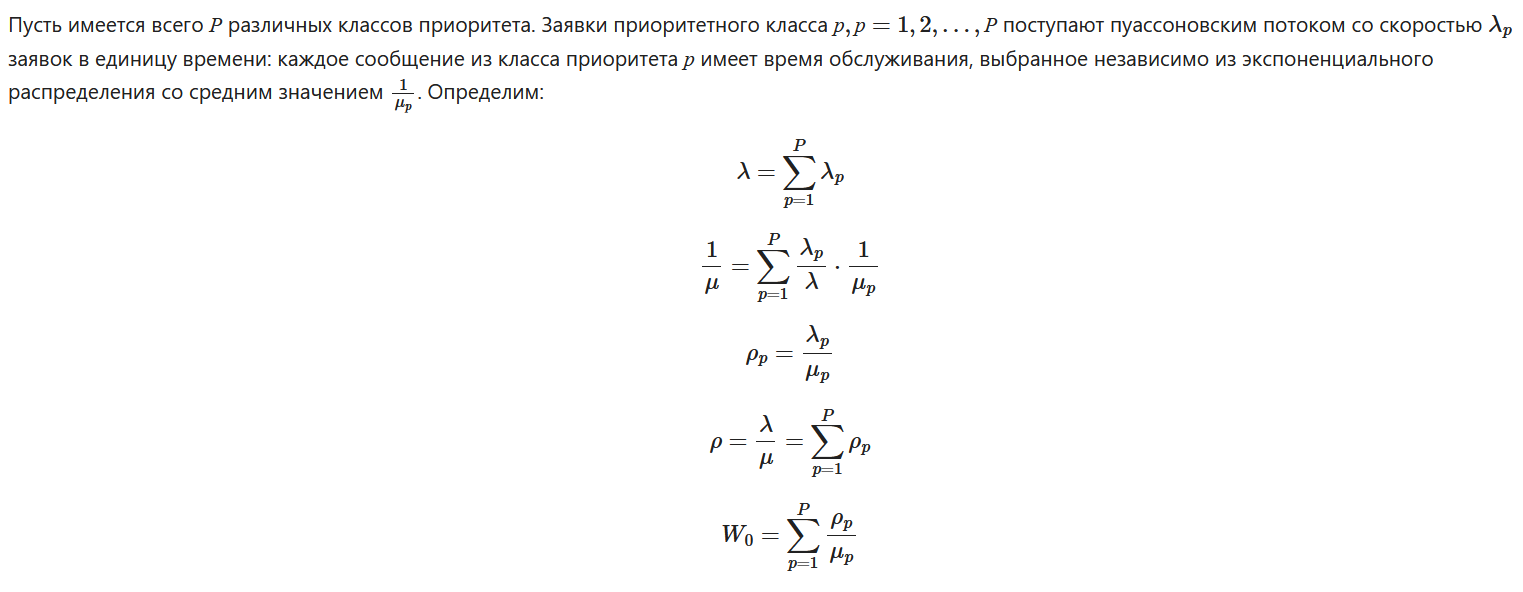

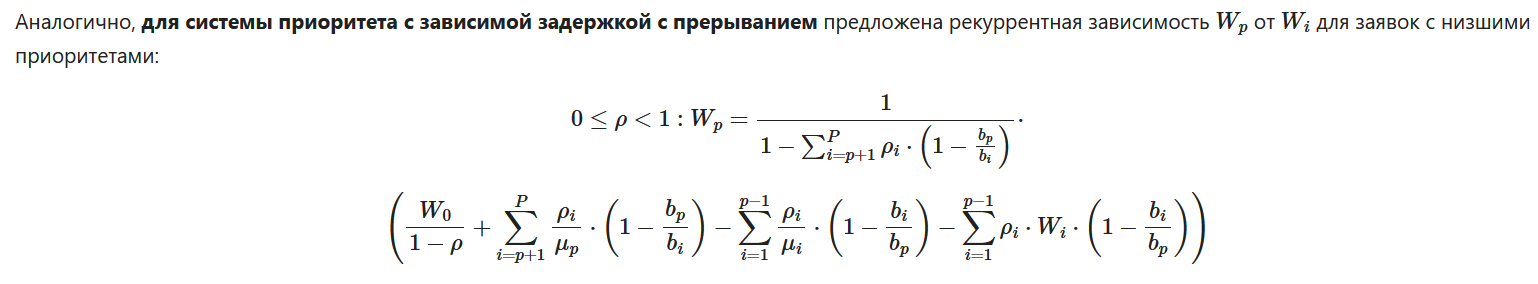

In [ ]:

lambda_o<-sum(lambda)
p_p<-lambda/mu
mu_o<-sum((lambda/mu)/lambda_o)
mu_o<-1/mu_o
p<-lambda_o/mu_o
W_0<-sum(p_p/mu)
W_P<-function(p_i, W)
{
  sum_1<-0
  sum_2<-0
  sum_3<-0
  sum_4<-0
  if(p_i<4)
  {
    for (i in c((p_i+1):P))
    {
      sum_1<-sum_1+p_p[i]*(1-b[p_i]/b[i])
      sum_2<-sum_2+(p_p[i]/mu[p_i])*(1-b[p_i]/b[i])
    }
  }
  if(p_i>1)
  {
    for(i in c(1:(p_i-1)))
    {
      sum_3<-sum_3+(p_p[i]/mu[i])*(1-b[i]/b[p_i])
      sum_4<-sum_4+(p_p[i]*W[i])*(1-b[i]/b[p_i])
    }
  }
  W_p<-(1/(1-sum_1))*((W_0/(1-p))+sum_2-sum_3-sum_4)
  return(W_p)
}
W<-c()
for(i in c(1:P))
{
  W[length(W)+1]<-W_P(i, W)
}

T<-200000
system<-matrix(ncol=0, nrow=5)
program<-vector("integer", P)
time1<-c()
time2<-c()
time3<-c()
time4<-c()
#time5<-c()
#time6<-c()
for(i in c(1:P))
{
  program[i]<-rexp(1, lambda[i])
}
tic<-min(program)
t<-tic
while(t<T)
{
  if(length(system[1,])>0)
  {
    system[3,1]<-system[3,1]-tic
    if(system[3,1]<=0)
    {
      if(system[1,1]==1)
        time1[length(time1)+1]<-t-system[2,1]-system[5,1]
      else if(system[1,1]==2)
        time2[length(time2)+1]<-t-system[2,1]-system[5,1]
      else if(system[1,1]==3)
        time3[length(time3)+1]<-t-system[2,1]-system[5,1]
      else if(system[1,1]==4)
        time4[length(time4)+1]<-t-system[2,1]-system[5,1]

      system[4,1]<--1
      prior<-0
      system[,1]<-system[,which(system[4,]==max(system[4,]))[1]]
      if(length(system[1,])>1)
      {
        prior<-system[4,1]
        system[4,1]<-0
      }
      system<-matrix(system[,-which(system[4,]==max(system[4,]))[1]], nrow=5)
      if(length(system[1,])>0)
        system[4,1]<-prior
    }
  }
  for(i in c(1:P))
  {
    program[i]<-program[i]-tic
    if(program[i]<=0)
    {
      program[i]<-rexp(1, lambda[i])
      time<-rexp(1, mu[i])
      system<-cbind(system, c(i, t, time, 0, time))
    }
  }
  tic<-min(program)
  if(length(system[1,])>0)
    if(system[3,1]<tic)
      tic<-system[3,1]
  dt<-0
  if(length(system[1,])>0)
  {
    while(dt<tic)
    {
      for(i in c(1:length(system[1,])))
      {
        system[4,i]<-(t+dt-system[2,i])*b[system[1,i]]
        if(length(system[1,])>1)
          if(system[4,i]>system[4,1])
          {
            bufer<-c(system[,i])
            system[,i]<-system[,1]
            system[3,i]<-system[3,i]-dt
            system[,1]<-bufer
            system[3,1]<-system[3,1]+dt
            tic<-min(program)
            if(system[3,1]<tic)
              tic<-system[3,1]
          }
      }
      dt<-dt+0.1
    }
  }
  t<-t+tic
  print(t)
}
W_exp<-c(mean(time1), mean(time2), mean(time3), mean(time4))
print(W)
print(W_exp)